# Process IMGs to RNN 

In [31]:
import os, sys, dicom as dm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Test Speed

In [7]:
with open('online.pk','r') as f:
    img = pk.load(f)

print img.shape

(279, 256, 256)


In [9]:
import json, time
f = open('test.js','w')
img_list = img.tolist()

now = time.time()
json.dump(img_list, f)
print 'json', time.time() - now
f.close()

now = time.time()
img.tofile('numpy')
print 'numpy', time.time() - now

json 14.2743690014
numpy 0.0481040477753


## Start to load

In [4]:
import numpy as np, re
ONLINE_DICT={
    'SC-HF-I-9':'0241',
    'SC-HF-I-10':'0024',
    'SC-HF-I-11':'0043',
    'SC-HF-I-12':'0062',
    'SC-HF-NI-12': '0286',
    'SC-HF-NI-13':'0304',
    'SC-HF-NI-14':'0331',
    'SC-HF-NI-15':'0359',
    'SC-HYP-9':'0003',
    'SC-HYP-10':'0579',
    'SC-HYP-11':'0601',
    'SC-HYP-12':'0629',
    'SC-N-9':'1031',
    'SC-N-10':'0851',
    'SC-N-11':'0878'
}


VALIDATION_DICT={
    'SC-HF-I-5':'0156',
    'SC-HF-I-6':'0180',
    'SC-HF-I-7':'0209',
    'SC-HF-I-8':'0226',
    'SC-HF-NI-7':'0523',
    'SC-HF-NI-11':'0270',
    'SC-HF-NI-31':'0401',
    'SC-HF-NI-33':'0424',
    'SC-HYP-6':'0767',
    'SC-HYP-7':'0007',
    'SC-HYP-8':'0796',
    'SC-HYP-37':'0702',
    'SC-N-5':'0963',
    'SC-N-6':'0984',
    'SC-N-7':'1009'
}

TRAINING_DICT= {
    "SC-HF-I-1": "0004",
    "SC-HF-I-2": "0106",
    "SC-HF-I-4": "0116",
    "SC-HF-I-40": "0134",
    "SC-HF-NI-3": "0379",
    "SC-HF-NI-4": "0501",
    "SC-HF-NI-34": "0446",
    "SC-HF-NI-36": "0474",
    "SC-HYP-1": "0550",
    "SC-HYP-3": "0650",
    "SC-HYP-38": "0734",
    "SC-HYP-40": "0755",
    "SC-N-2": "0898",
    "SC-N-3": "0915",
    "SC-N-40": "0944",
}

- open one of the three folders
- open patients folders and load the right sax
- get array of T-N-1-256-256 and save to name

In [60]:
import cv2, pickle as pk
MAP = {
    'challenge_online' : 'OnlineDataContours',
    'challenge_training': 'TrainingDataContours',
    'challenge_validation': 'ValidationDataContours',
}


def load_save(dirname, dic):
    subdir = [ p for p in os.listdir(dirname) if 'SC-' in p]
    N = len(subdir)
    img_dict = {}
    for p in subdir:
        i = []
        l = []
        m = []
        for img in sorted(os.listdir(os.path.join(dirname, p))):
            match = re.search( r'IM-%s-(\d{4}).dcm'%dic[p] , img)
            if match:
                new = True
                try:
                    array=dm.read_file(os.path.join(dirname,p,img)).pixel_array.astype(np.int)
                except Exception, e:
                    print 'IGNORE shape', e
                    new = False
                
                if array.shape ==(256,256) and new:
                    i.append(array)

                    ctrp = p.split('-')
                    ctrp = "-".join(ctrp[:-1])+"-%02d"%int(ctrp[-1])

                    ctrfile = os.path.join(MAP[dirname],ctrp,'contours-manual','IRCCI-expert',\
                                           'IM-0001-%s-icontour-manual.txt'% match.group(1))
                    label = np.zeros((256,256), dtype="uint8")
                    try:
                        cpts = np.loadtxt(ctrfile, delimiter=" ").astype(np.int) 
                        cv2.fillPoly(label, [cpts], 1)
                        m.append(1)

                    except Exception, e:
                        m.append(0)

                    l.append(label)
                else:
                    print '{0} {1} {2}'.format(p, img, array.shape)
                    try:
                        if new:
                            plt.imshow(array)
                            plt.show()
                    except Exception, e:
                        pass
                        # print '\n\nError\n\n'

       
        all_img = np.stack(i)
        all_ll  = np.stack(l)
        with open('%s.pk'%p, 'w') as f:
            pk.dump(all_img,f)
            pk.dump(all_ll,f)
            pk.dump(m,f)
        img_dict[p] = [all_img, all_ll, m]
        
    return img_dict


SC-HF-NI-14 IM-0331-0281.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0282.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0283.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0284.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0285.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0286.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0287.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0288.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0289.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0290.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0291.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0292.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0293.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0294.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0295.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0296.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0297.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0298.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0299.dcm (3, 544, 544)
SC-HF-NI-14 IM-0331-0300.dcm (3, 544, 544)
SC-HYP-9 IM-0003-0241.dcm (3, 544, 544)
SC-HYP-9 IM-0003-0242.dcm (3, 544, 544)
SC-HYP-9 IM-0003-0243.dcm (3, 544, 544)
SC-HYP-9 IM-0003-024

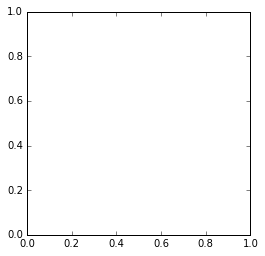

In [61]:
ds = []
ds.append(load_save('challenge_online', ONLINE_DICT))
ds.append(load_save('challenge_validation', VALIDATION_DICT))
ds.append(load_save('challenge_training', TRAINING_DICT ))

In [64]:
with open('SC-HYP-10.pk','r') as f:
    img = pk.load(f)
    ll = pk.load(f)
    m = pk.load(f)
print m

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


(180, 256, 256)


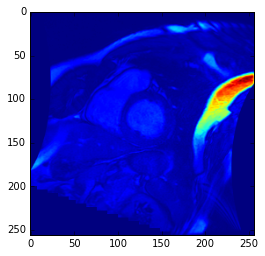

In [65]:
print img.shape
plt.imshow(img[0])
plt.show()

In [66]:
for d in ds:
    print 
    for k , v in d.items():
        print k
        l = d[k]
        print l[0].shape, l[1].shape, len(l[2])


SC-HYP-11
(280, 256, 256) (280, 256, 256) 280
SC-HYP-10
(180, 256, 256) (180, 256, 256) 180
SC-HYP-12
(180, 256, 256) (180, 256, 256) 180
SC-HF-I-11
(240, 256, 256) (240, 256, 256) 240
SC-HF-I-10
(260, 256, 256) (260, 256, 256) 260
SC-HF-I-12
(240, 256, 256) (240, 256, 256) 240
SC-HF-I-9
(280, 256, 256) (280, 256, 256) 280
SC-HYP-9
(240, 256, 256) (240, 256, 256) 240
SC-N-9
(200, 256, 256) (200, 256, 256) 200
SC-HF-NI-12
(280, 256, 256) (280, 256, 256) 280
SC-HF-NI-13
(220, 256, 256) (220, 256, 256) 220
SC-N-10
(240, 256, 256) (240, 256, 256) 240
SC-N-11
(180, 256, 256) (180, 256, 256) 180
SC-HF-NI-14
(280, 256, 256) (280, 256, 256) 280
SC-HF-NI-15
(220, 256, 256) (220, 256, 256) 220

SC-HF-NI-31
(280, 256, 256) (280, 256, 256) 280
SC-N-5
(160, 256, 256) (160, 256, 256) 160
SC-HF-NI-7
(260, 256, 256) (260, 256, 256) 260
SC-HYP-37
(218, 256, 256) (218, 256, 256) 218
SC-HF-I-8
(240, 256, 256) (240, 256, 256) 240
SC-HF-NI-33
(240, 256, 256) (240, 256, 256) 240
SC-HYP-8
(240, 256, 256) (2